# Parameter Tuning2

**Parameter Tuning 기준 : 정확도, AUC**  
**1. GridSearchCV**   
**2. 베이지안 최적화**  
**3. 앙상블 (Voting)**

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
Train = pd.read_csv("C:/Users/kimch/Desktop/hospital_preprocessed_dataset/train_df.csv")
Test = pd.read_csv("C:/Users/kimch/Desktop/hospital_preprocessed_dataset/test_df.csv")

In [4]:
# csv 파일로 변환하면서 Unnamed: 0이라는 컬럼이 생긴 듯 함 -> 제거
Train = Train.drop(columns=["instkind_nan", "Unnamed: 0"])
Test = Test.drop(columns=["instkind_nan", "Unnamed: 0"])

In [5]:
Train = Train.set_index("inst_id")
Test = Test.set_index("inst_id")

In [6]:
Train

,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
inst_id,,,,,,,,,,,,,,,,,,,,,
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
9,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,21.685753,0.000000,22.641007,22.503290,22.405862,20.514569,5.267858,4.955827,0.0,3.0
423,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.382027,4.382027,0.0,3.0
426,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,21.498441,0.000000,22.158142,21.639056,21.904736,0.000000,3.860891,3.905642,0.0,3.0


In [7]:
Test

,OC,sido_choongchung,sido_gyeongin,sido_gyeongsang,sido_jeju,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
inst_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,24.648885,24.338050,22.275075,22.268698,23.501178,22.914314,6.542472,6.542472,0.0,3.0
5,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,24.463273,23.909618,23.950510,23.630167,22.055404,0.000000,5.940171,5.918894,0.0,2.0
6,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,24.047434,23.806220,0.000000,0.000000,0.000000,23.519657,5.285888,5.225619,0.0,3.0
8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,22.980460,22.170624,21.662855,0.000000,24.390483,0.000000,6.634633,6.634633,0.0,4.0
10,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,22.742900,21.916712,24.318498,23.784183,23.971502,23.436150,6.082219,5.955837,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,23.279082,0.000000,21.735002,0.000000,23.351521,0.000000,6.329721,4.949613,0.0,3.0
425,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.042985,0.000000,21.310989,21.277151,22.872059,22.688514,4.890349,4.927254,0.0,3.0
429,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.588876,4.544446,0.0,3.0


## Selected Features

In [7]:
fs = ["sga1", "salary1", "revenue1", "profit2", "interest2", "interest1", "receivableS1", "receivableL1", "quickAsset1", "liquidAsset1", "employee2", "debt1", "instkind_nursing_hospital", "OC"]

sg1 : 판매비와 관리비 (2017)  
salary1 : 급여 (2017)  
revenue1 : 매출액 (2017)  
profit2 : 당기순이익 (2016)  
interest2 : 이자비용 (2016)  
interest1 : 이자비용 (2017)  
receivableS1 : 단기 미수금 (2017)  
receivableL1 : 장기 미수금 (2017)  
quickAsset1: 당좌자산 (2017)  
liquidAsset1 : 유동자산 (2017)  
employee2 : 고용한 총 직원의 수 (2016)  
debt1 : 부채총계 (2017)  
instkind_nursing_hospital : 병원의 종류- 요양병원인지(1) 아닌지(0)  
OC: 결과변수- 병원의 개폐업 여부 (개업:1, 폐업:0)

In [8]:
train = Train[fs]
test = Test[fs]

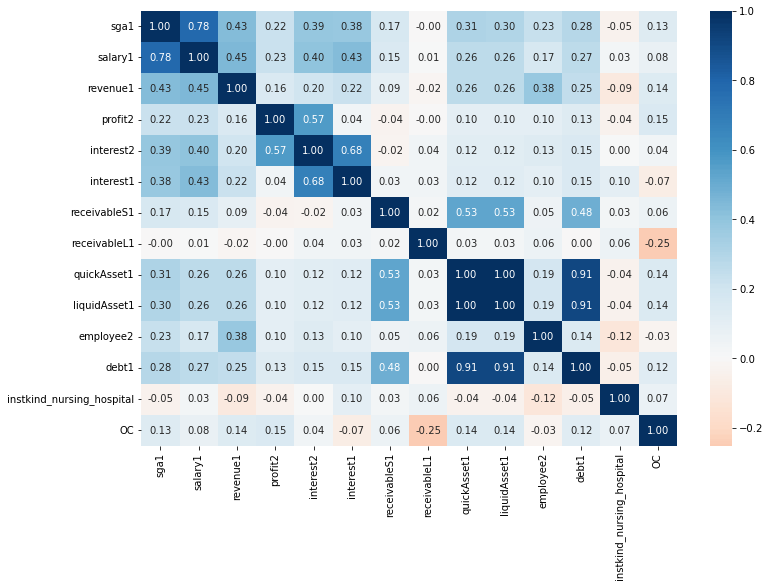

In [10]:
corr = train.corr()

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

plt.show()

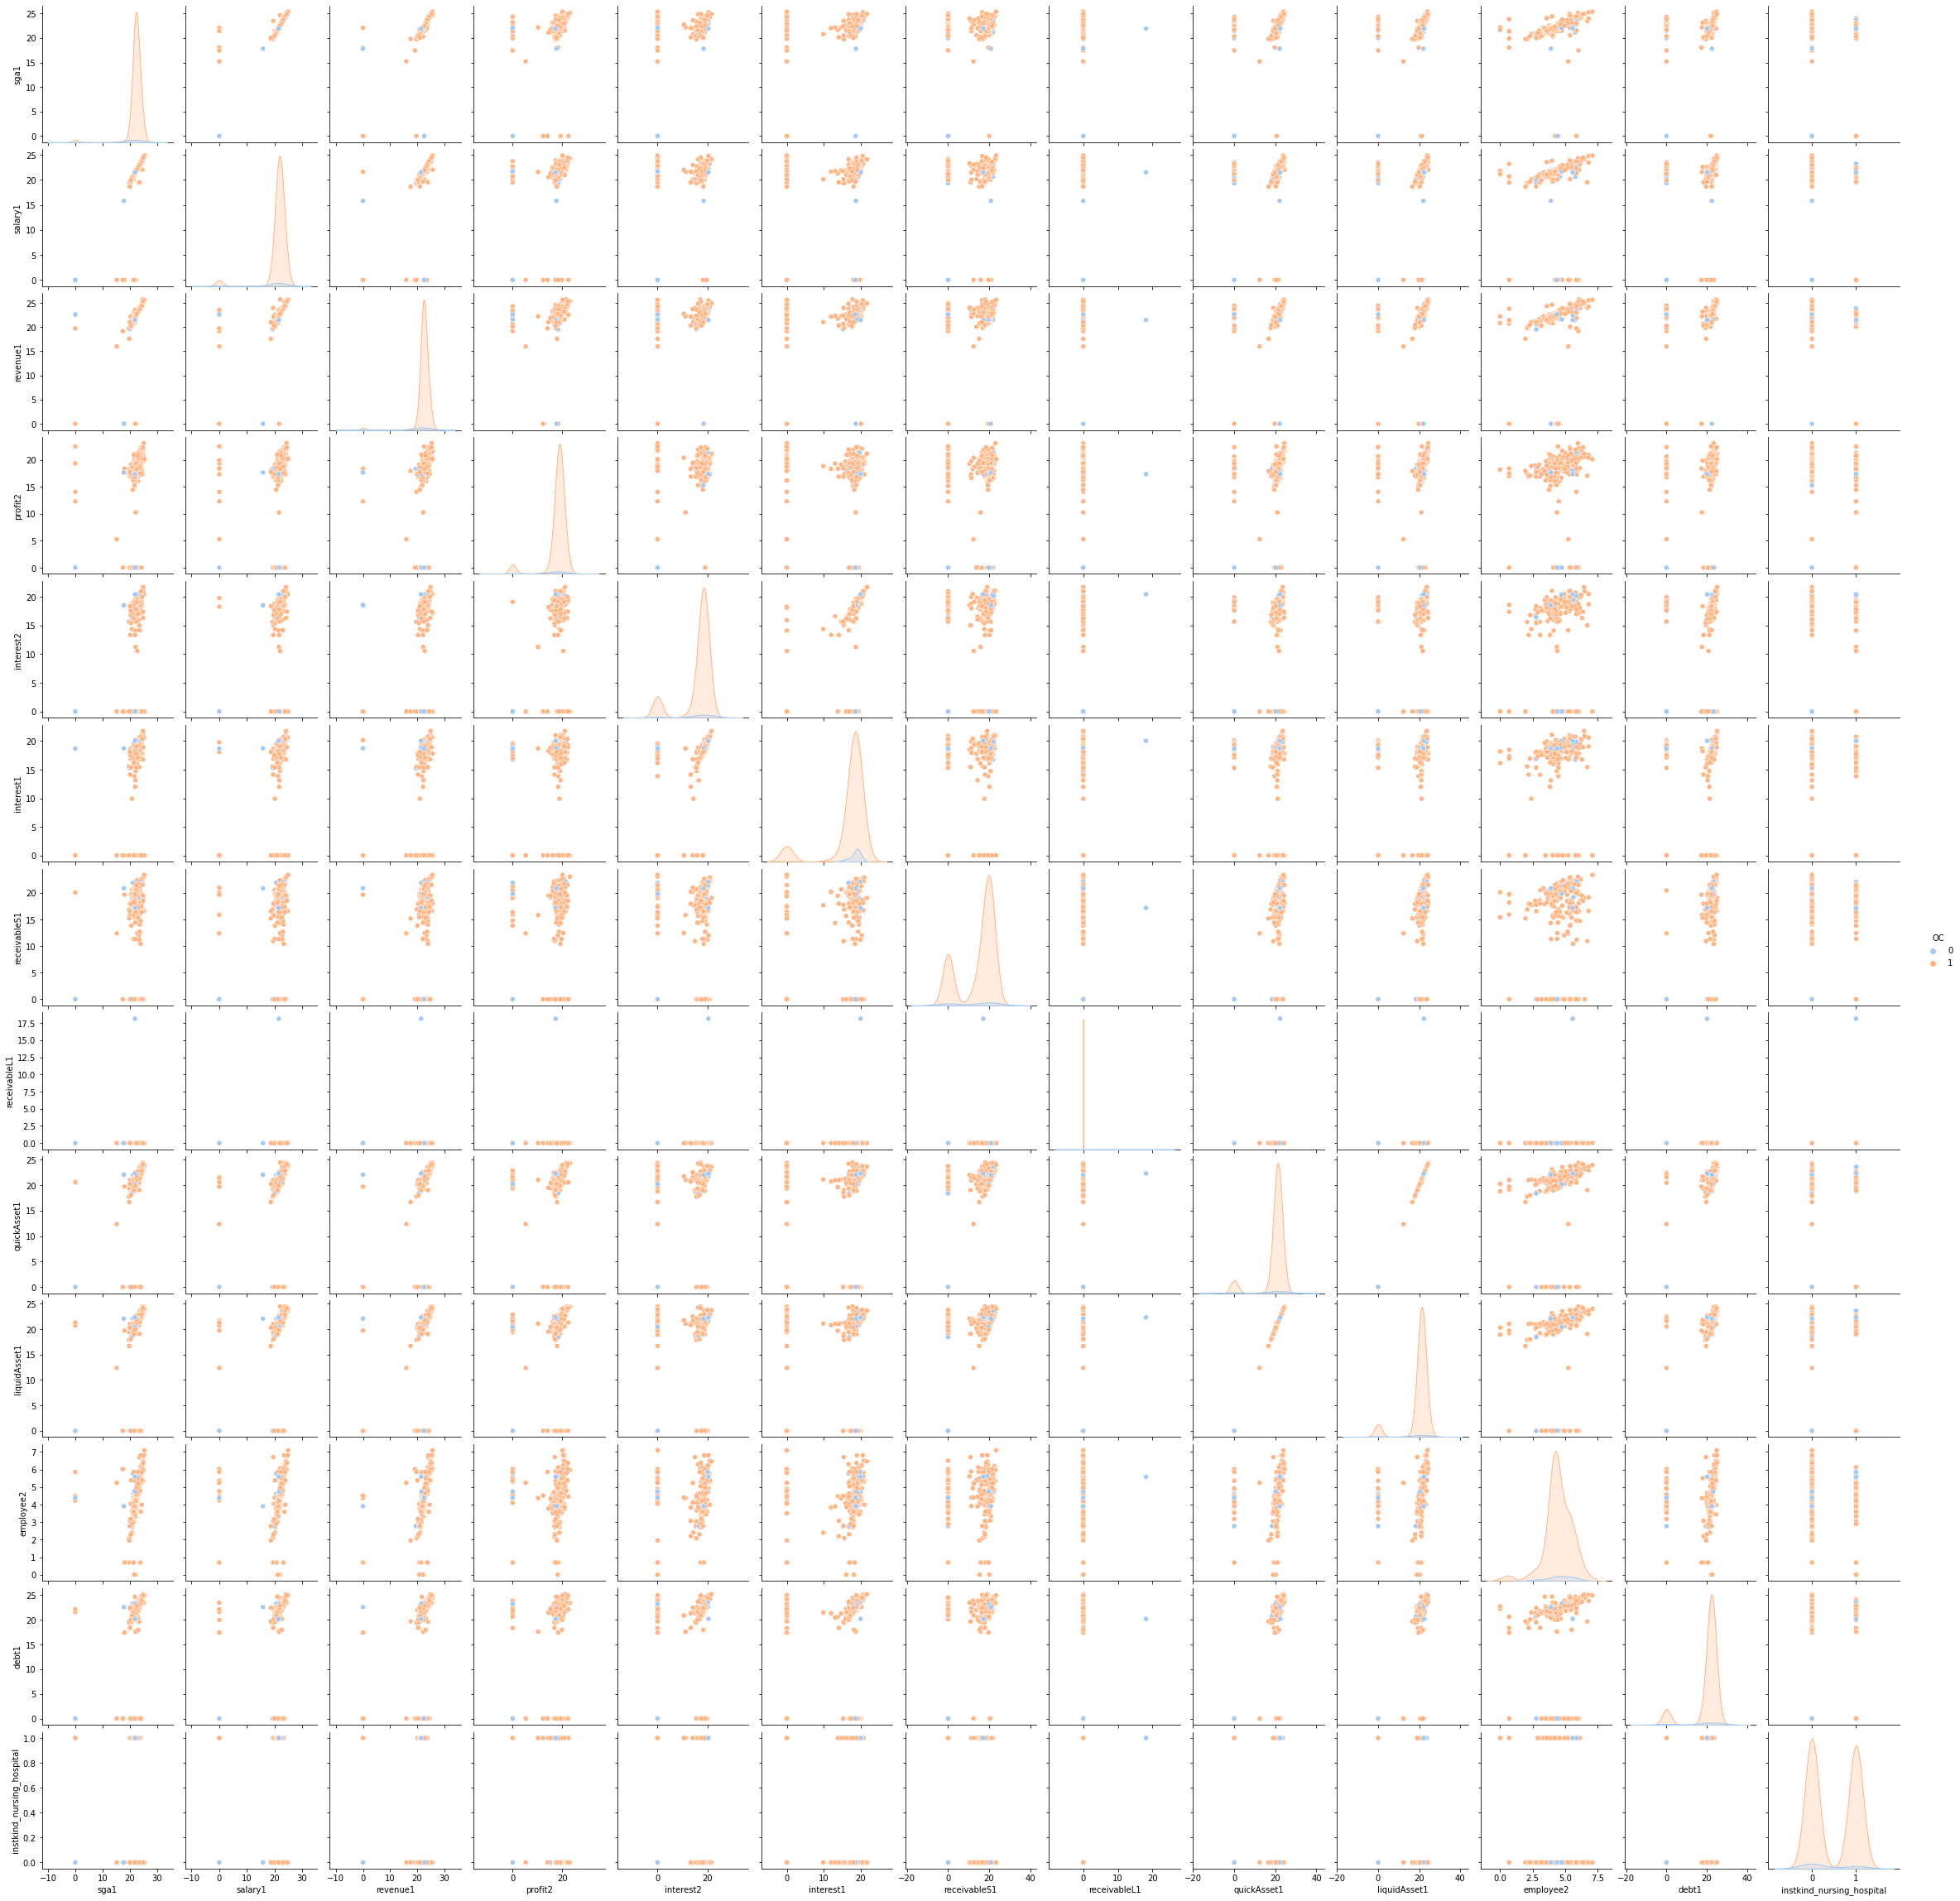

In [11]:
sns.pairplot(train, diag_kind="kde", hue = "OC", palette="pastel")
plt.show()

1 ) liquidAsset1 - quickAsset1 상관계수 1, debt1 - quickAsset1 상관계수 0.91, debt1 - liquidAsset1 상관계수 0.91  
-> liquidAsset1, quickAsset1, debt1 중 하나 고르면 될 듯  
-> 유동자산 liquidAsset (현금 및 비교적 단기 내에 회수 또는 판매에 의하여 현금화할 수 있는 재화)   
= 당좌자산 quickAsset (현금화가 매우 신속하게 이뤄질 수 있는 자산) + 재고자산 inventoryAsset (복잡한 과정을 거쳐야만 현금화가 가능한 자산)   
-> liquidAsset과 quickAsset은 상하관계니 상관계수 높음    
-> 근데 왜 debt는 liquidAsset, quickAsset이랑 상관관계가 높을까: 찾아보니깐 부채(= 빚)도 자산으로 취급할 수 있음 (ex: 빚투한 후 이득 얻으면 자산),  
병원은 개업 비용. 기기 구입 등 빚을 내도 수입(현금) 으로 이어지는 비율이 높으니 + 데이터에 open 데이터가 많으니 상관계수가 높은 것으로 보임  
=> **close인 데이터들은 liquidAsset과 debt간 상관관계가 open인 데이터들에 비해 낮으려나?**  
2 ) interest1, interst2 아무래도 년도 차이다 보니 상관관계 있음  
-> interest1 - interst2 = 2017년도와 2016년도의 이자비용 차이 칼럼 새로 생성해서 OC와 상관계수 살펴보자  
3 ) sga1, salary1도 상관관계 높은 편, 개념 살펴보자

In [12]:
O = train[train.OC == 1]
C = train[train.OC == 0]

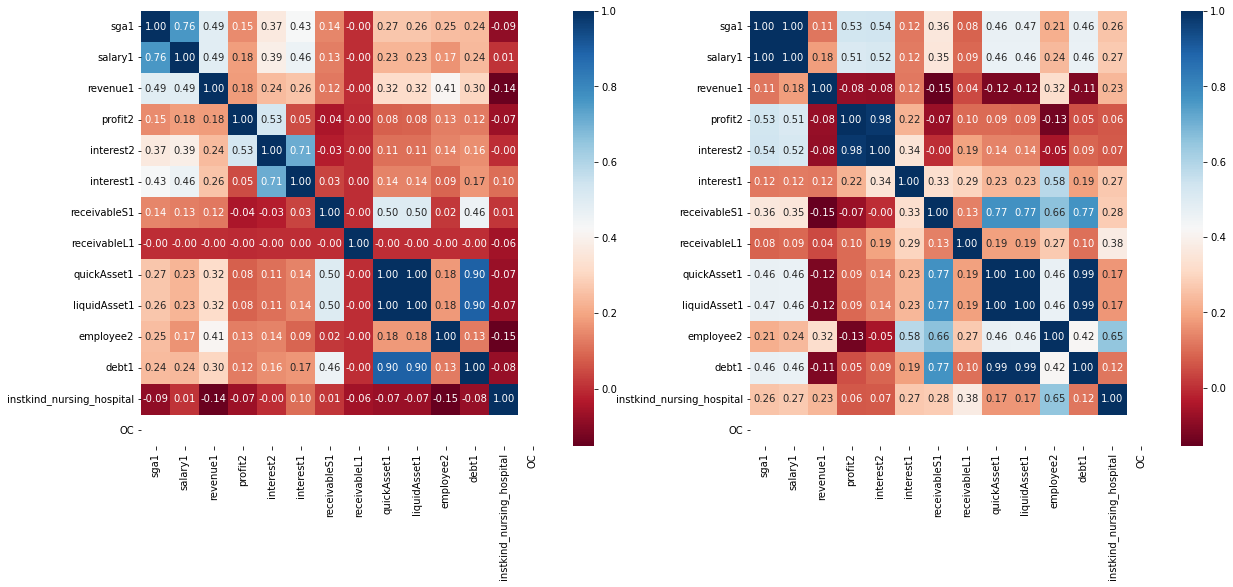

In [13]:
# 1) close 데이터들은 liquidAsset과 debt간 상관관계가 예측한 것과 다름 => liquidAsset1, debt1 사용 (quickAsset1 버림)
# 3) 오히려 close한 데이터들이 sga1 - salary1 상관관계가 1이 됨으로써 open한 데이터와 차이를 보임
# 근데 close 데이터가 원체 적어서,, 
ocorr = O.corr()
ccorr = C.corr()

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)
sns.heatmap(ocorr, annot=True, fmt=".2f", cmap="RdBu", ax=axes[0])
sns.heatmap(ccorr, annot=True, fmt=".2f", cmap="RdBu", ax=axes[1])

plt.show()

In [9]:
train["interestDiff"] = train["interest1"] - train["interest2"]

In [15]:
# 2 ) interestDiff가 interest1, interst2 이렇게 있는 것 보다 상관관계 더 높고 변수 줄 일 수 있음 => interestDiff 사용하기로 (이래도 되는건가)
corr2 = train.corr()
corr2[["OC"]]

,OC
sga1,0.134012
salary1,0.078294
revenue1,0.138317
profit2,0.152172
interest2,0.038370
interest1,-0.074613
receivableS1,0.062037
receivableL1,-0.252059
quickAsset1,0.140066
liquidAsset1,0.140228


In [10]:
train_df = train[["sga1", "salary1", "revenue1", "profit2", "receivableS1", "receivableL1", "liquidAsset1", "employee2", "debt1", "instkind_nursing_hospital", "interestDiff", "OC"]]

In [11]:
test["interestDiff"] = test["interest1"] - test["interest2"]
test_df = test[["sga1", "salary1", "revenue1", "profit2", "receivableS1", "receivableL1", "liquidAsset1", "employee2", "debt1", "instkind_nursing_hospital", "interestDiff", "OC"]]

**최종 feature ;  
sga1, salary1, revenue1, profit2, receivalbleS1, receivableL1, liquidAsset1, employee2, debt1, instkind_nursing_hospital, interestDiff, OC**

## Train -> Train, Valid, Test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = train_df.drop(columns=["OC"])
y = train["OC"]

train_X, resid_X, train_y, resid_y = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=22)
valid_X, test_X, valid_y, test_y = train_test_split(resid_X, resid_y, test_size=0.5, shuffle=True, random_state=22)

In [20]:
train_y.shape

(210,)

In [21]:
valid_y.shape

(45,)

In [22]:
test_y.shape

(46,)

## Oversampling

In [23]:
train_y.value_counts()

1    201
0      9
Name: OC, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE(random_state=11)

In [16]:
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y)

In [27]:
train_y_smote.value_counts()

1    201
0    201
Name: OC, dtype: int64

In [28]:
valid_y.value_counts()

1    42
0     3
Name: OC, dtype: int64

In [29]:
test_y.value_counts()

1    43
0     3
Name: OC, dtype: int64

## GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

## - Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

### 1. 정확도

In [32]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [2, 5, 10], 
    "min_samples_split": [6, 8, 10],
    "min_impurity_decrease": [0, 0.001, 0.01]
}
 
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
# scoring = "accuracy"
gridSearch = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

gridSearch.fit(train_X_smote, train_y_smote)
print("Best Score :", gridSearch.best_score_)
print("Best Parameters :", gridSearch.best_params_)

Best Score : 0.9528086419753086
Best Parameters : {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


**정확도 기준 Random Forest 파라미터:  
max_depth=10, min_impurity_decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100**

In [33]:
best_rf = RandomForestClassifier(random_state=0, max_depth=10, min_impurity_decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
best_rf.fit(train_X_smote, train_y_smote)

RandomForestClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=2, min_samples_split=6, random_state=0)

In [24]:
from dmba import classificationSummary

In [35]:
classificationSummary(train_y_smote, best_rf.predict(train_X_smote))

Confusion Matrix (Accuracy 0.9925)

       Prediction
Actual   0   1
     0 200   1
     1   2 199


In [36]:
classificationSummary(valid_y, best_rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9333)

       Prediction
Actual  0  1
     0  1  2
     1  1 41


In [37]:
classificationSummary(test_y, best_rf.predict(test_X))

Confusion Matrix (Accuracy 0.9130)

       Prediction
Actual  0  1
     0  0  3
     1  1 42


### 2. AUC  
참고: https://bskyvision.com/1165   
ROC 커브는 FPR (실제 음성 중 양성으로 잘못 예측된 것의 비율)과 TPR (실제 양성 중 양성으로 잘 예측된 것의 비율) 쌍을 그래프에 찍은 후 이어준 것  
AUC는 ROC 커브 아랫부분의 넓이, FPR의 값이 작아질 때, TPR이 천천히 작아진다면 좋은 성능의 이진분류기  
대개 AUC가 0.8 이상이면 아주 훌륭한 성능을 가진 이진분류기라 평가, 0.7 ~ 0.8이면 좋은 이진분류기, 0.5 ~ 0.7이면 도움은 되는 이진분류기

In [38]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, 15],
    "min_samples_leaf": [2, 5, 10], 
    "min_samples_split": [6, 8, 10],
    "min_impurity_decrease": [0, 0.001, 0.01]
}
 
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
# scoring = "roc_auc"
gridSearch = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)

gridSearch.fit(train_X_smote, train_y_smote)
print("Best Score :", gridSearch.best_score_)
print("Best Parameters :", gridSearch.best_params_)

Best Score : 0.9894939024390244
Best Parameters : {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


In [39]:
best_rf_auc = RandomForestClassifier(random_state=0, max_depth=15, min_impurity_decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
best_rf_auc.fit(train_X_smote, train_y_smote)

RandomForestClassifier(max_depth=15, min_impurity_decrease=0,
                       min_samples_leaf=2, min_samples_split=6, random_state=0)

In [21]:
from sklearn.metrics import roc_auc_score

In [41]:
print("Train AUC : {:.4f}".format(roc_auc_score(train_y_smote, best_rf_auc.predict(train_X_smote))))

Train AUC : 0.9925


In [42]:
print("Valid AUC : {:.4f}".format(roc_auc_score(valid_y, best_rf_auc.predict(valid_X))))

Valid AUC : 0.6548


In [43]:
print("Test AUC : {:.4f}".format(roc_auc_score(test_y, best_rf_auc.predict(test_X))))

Train AUC : 0.4884


### 컷오프값 변경
-> 컷오프값 proba0 낮추는 것이 더 AUC score 좋음

In [44]:
# 컷오프값 proba0 기준 0.3
changeCutoff = pd.concat([train_X_smote, train_y_smote], axis=1)
changeCutoff["proba0"] = best_rf_auc.predict_proba(train_X_smote)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"][i] >= 0.3:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [45]:
print("Cutoff 0.4 Train AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Train AUC : 0.9826


In [46]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.9826)

       Prediction
Actual   0   1
     0 201   0
     1   7 194


In [47]:
changeCutoff = pd.concat([valid_X, valid_y], axis=1)
changeCutoff["proba0"] = best_rf_auc.predict_proba(valid_X)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"].iloc[i] >= 0.3:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [48]:
print("Cutoff 0.4 Valid AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Valid AUC : 0.9286


In [49]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.8667)

       Prediction
Actual  0  1
     0  3  0
     1  6 36


In [50]:
changeCutoff = pd.concat([test_X, test_y], axis=1)
changeCutoff["proba0"] = best_rf_auc.predict_proba(test_X)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"].iloc[i] >= 0.3:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [51]:
print("Cutoff 0.4 Test AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Test AUC : 0.7636


In [52]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.8478)

       Prediction
Actual  0  1
     0  2  1
     1  6 37


## - GBM

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

### 1. 정확도

In [55]:
param_grid = {
    "max_depth": [5, 8, 10],
    "min_samples_split": [6, 8, 10],
    "min_samples_leaf": [2, 5, 10], 
    "n_estimators": [10, 50, 100], 
    "learning_rate": [0.1, 0.3, 0.5],
    "subsample": [0.5, 0.6, 0.8, 1]
}

gbm = GradientBoostingClassifier(random_state=0)
# scoring= "accuracy"
gridSearch = GridSearchCV(gbm, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

gridSearch.fit(train_X_smote, train_y_smote)
print("Best Score :", gridSearch.best_score_)
print("Best Parameters :", gridSearch.best_params_)

Best Score : 0.9776234567901234
Best Parameters : {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 100, 'subsample': 0.6}


**정확도 기준 GBM 파라미터 :  
learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6**

In [56]:
best_gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6)
best_gbm.fit(train_X_smote, train_y_smote)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                           random_state=0, subsample=0.6)

In [57]:
classificationSummary(train_y_smote, best_gbm.predict(train_X_smote))

Confusion Matrix (Accuracy 0.9925)

       Prediction
Actual   0   1
     0 199   2
     1   1 200


In [58]:
classificationSummary(valid_y, best_gbm.predict(valid_X))

Confusion Matrix (Accuracy 0.9556)

       Prediction
Actual  0  1
     0  2  1
     1  1 41


In [59]:
classificationSummary(test_y, best_gbm.predict(test_X))

Confusion Matrix (Accuracy 0.9348)

       Prediction
Actual  0  1
     0  0  3
     1  0 43


### 2. AUC

In [60]:
param_grid = {
    "max_depth": [5, 8, 10],
    "min_samples_split": [6, 8, 10],
    "min_samples_leaf": [2, 5, 10], 
    "n_estimators": [10, 50, 100], 
    "learning_rate": [0.1, 0.3, 0.5],
    "subsample": [0.5, 0.6, 0.8, 1]
}

gbm = GradientBoostingClassifier(random_state=0)
# scoring = "roc_auc"
gridSearch = GridSearchCV(gbm, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)

gridSearch.fit(train_X_smote, train_y_smote)
print("Best Score :", gridSearch.best_score_)
print("Best Parameters :", gridSearch.best_params_)

Best Score : 0.9952987804878048
Best Parameters : {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 100, 'subsample': 0.6}


In [18]:
best_gbm_auc = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6)
best_gbm_auc.fit(train_X_smote, train_y_smote)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                           random_state=0, subsample=0.6)

In [62]:
print("Train AUC : {:.4f}".format(roc_auc_score(train_y_smote, best_gbm_auc.predict(train_X_smote))))

Train AUC : 0.9925


In [63]:
print("Valid AUC : {:.4f}".format(roc_auc_score(valid_y, best_gbm_auc.predict(valid_X))))

Valid AUC : 0.8214


In [64]:
print("Test AUC : {:.4f}".format(roc_auc_score(test_y, best_gbm_auc.predict(test_X))))

Test AUC : 0.5000


### 컷오프값 변경

In [41]:
# randomforest와 다르게 gbm은 proba0 기준 컷오프값 0.4가 더 auc score 좋음
changeCutoff = pd.concat([train_X_smote, train_y_smote], axis=1)
changeCutoff["proba0"] = best_gbm_auc.predict_proba(train_X_smote)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"][i] >= 0.4:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [42]:
print("Cutoff 0.4 Train AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Train AUC : 0.9925


In [43]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.9925)

       Prediction
Actual   0   1
     0 200   1
     1   2 199


In [44]:
changeCutoff = pd.concat([valid_X, valid_y], axis=1)
changeCutoff["proba0"] = best_gbm_auc.predict_proba(valid_X)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"].iloc[i] >= 0.4:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [45]:
print("Cutoff 0.4 Valid AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Valid AUC : 0.8095


In [46]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.9333)

       Prediction
Actual  0  1
     0  2  1
     1  2 40


In [47]:
changeCutoff = pd.concat([test_X, test_y], axis=1)
changeCutoff["proba0"] = best_gbm_auc.predict_proba(test_X)[:,0]
prediction = []

for i in range (len(changeCutoff)):
    if changeCutoff["proba0"].iloc[i] >= 0.4:
        prediction.append(0)
    else:
        prediction.append(1)
changeCutoff["prediction"] = prediction

In [48]:
print("Cutoff 0.4 Test AUC : {:.4f}".format(roc_auc_score(changeCutoff.OC, changeCutoff.prediction)))

Cutoff 0.4 Test AUC : 0.6318


In [49]:
classificationSummary(changeCutoff.OC, changeCutoff.prediction)

Confusion Matrix (Accuracy 0.8913)

       Prediction
Actual  0  1
     0  1  2
     1  3 40


## 결과 총정리

1. 랜덤 포레스트  
- 정확도 : max_depth=10, min_impurity_Decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100  
- **AUC : max_depth=15, min_impurity_Decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100 & 컷오프값 0.3**    
  
2. GBM  
- **정확도: learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6**  
- AUC : learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6 & 컷오프값 0.4  

## 베이지안 최적화 - 정확도 기준
https://wooono.tistory.com/102

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score

### - Random Forest

In [79]:
# 탐색 대상 함수
def RF_cv(max_depth, min_impurity_decrease, min_samples_leaf, min_samples_split, n_estimators):
    # 모델 정의
    model = RandomForestClassifier(max_depth = int(max_depth),
                                   min_impurity_decrease = min_impurity_decrease,
                                   min_samples_leaf = int(min_samples_leaf),
                                   min_samples_split = int(min_samples_split),
                                   n_estimators = int(n_estimators))
    
    # 모델 훈련 
    model.fit(train_X_smote, train_y_smote)
    
    # 예측값 출력
    pred_y = model.predict(test_X)
    
    # metric 계산 - accuracy, auc
    accuracy = accuracy_score(test_y, pred_y)
    auc = roc_auc_score(test_y, pred_y)
    
    # 오차 최적화로 사용할 metric 변환
    return accuracy

In [80]:
# !pip install bayesian-optimization

In [81]:
from bayes_opt import BayesianOptimization

In [82]:
# 실험해보고자 하는 hyperparameter 집합
pbounds = {"max_depth": (10, 15),
           "min_impurity_decrease": (0, 0.01),
           "min_samples_leaf": (2, 4),
           "min_samples_split": (6, 8), 
           "n_estimators": (100, 500)}

# Bayesian optimization 객체 생성
bo = BayesianOptimization(f=RF_cv, pbounds=pbounds, verbose=2, random_state=1)

# maximize 메소드를 이용해 최대화 과정 수행
bo.maximize(init_points=2, n_iter=15, acq="ei", xi=0.01)

# 찾은 파라미터값 확인
print(bo.max)

|   iter    |  target   | max_depth | min_im... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.8478   |  12.09    |  0.007203 |  2.0      |  6.605    |  158.7    |
|  2        |  0.9565   |  10.46    |  0.001863 |  2.691    |  6.794    |  315.5    |
|  3        |  0.9348   |  11.19    |  0.000904 |  2.947    |  6.991    |  315.2    |
|  4        |  0.9348   |  10.21    |  0.005748 |  2.99     |  6.668    |  316.9    |
|  5        |  0.8913   |  10.24    |  0.006578 |  2.561    |  6.188    |  314.6    |
|  6        |  0.913    |  10.23    |  0.007131 |  3.334    |  7.58     |  315.5    |
|  7        |  0.913    |  10.8     |  0.004952 |  2.869    |  6.72     |  316.1    |
|  8        |  0.913    |  11.17    |  0.001374 |  3.768    |  6.012    |  399.6    |
|  9        |  0.9348   |  12.75    |  0.002141 |  3.965    |  6.853    |  430.0    |
|  10       |  0.9348   |  13.31    |  0.005042 |  2.5

### - GBM

In [103]:
# 탐색 대상 함수
def GBM_cv(learning_rate, max_depth, min_samples_leaf, min_samples_split, n_estimators, subsample):
    # 모델 정의
    model = GradientBoostingClassifier(learning_rate = learning_rate,
                                      max_depth = int(max_depth), 
                                      min_samples_leaf = int(min_samples_leaf),
                                      min_samples_split = int(min_samples_split),
                                      n_estimators = int(n_estimators),
                                      subsample = subsample)
    # 모델 훈련
    model.fit(train_X_smote, train_y_smote)
    
    # 예측값 출력
    pred_y = model.predict(test_X)
    
    # metric 계산 - accuracy, auc
    accuracy = accuracy_score(test_y, pred_y)
    auc = roc_auc_score(test_y, pred_y)
    
    # 오차 최적화로 사용할 metric 변환
    return accuracy                                       

In [107]:
# 실험해보고자 하는 hyperparameter 집합
pbounds = {"learning_rate": (0.01, 0.1),
          "max_depth": (6, 8),
          "min_samples_leaf": (2, 4),
          "min_samples_split": (6, 8),
          "n_estimators": (100, 500),
          "subsample": (0.6, 1)
         }

# Bayesian optimization 객체 생성
# f: 탐색대상 함수, pbounds = 하이퍼 파라미터 집합, verbose: 2 (항상 출력), 1 (최댓값일 때 출력), 0 (출력안함)
bayes = BayesianOptimization(f=GBM_cv, pbounds=pbounds, verbose=2, random_state=0)

# maximize 메소드를 이용해 최대화 과정 수행
# init_points: 초기 Random Search 개수, n_iter: 반복횟수(많을수록 정확), acq: Acquisition Function, xi = exploration 강도
bayes.maximize(init_points=2, n_iter=20, acq="ei", xi=0.01)

print(bayes.max)
# 왜 보라색 안나오는겨... 다 비슷비슷하다 이말인가

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9348   |  0.05939  |  7.43     |  3.206    |  7.09     |  269.5    |  0.8584   |
|  2        |  0.9348   |  0.04938  |  7.784    |  3.927    |  6.767    |  416.7    |  0.8116   |
|  3        |  0.8696   |  0.01444  |  7.867    |  2.506    |  7.516    |  100.0    |  0.7017   |
|  4        |  0.9348   |  0.06178  |  7.418    |  3.066    |  7.083    |  268.4    |  0.7761   |
|  5        |  0.9348   |  0.05037  |  7.38     |  3.516    |  7.585    |  500.0    |  0.8746   |
|  6        |  0.913    |  0.01136  |  6.444    |  2.104    |  7.07     |  353.5    |  0.8456   |
|  7        |  0.9348   |  0.05114  |  6.045    |  2.119    |  7.216    |  457.2    |  0.7878   |
|  8        |  0.8913   |  0.05895  |  7.445    |  3.986    |  7.083    |  209.3    |  0.9986   |
|  9        |  0.913

## 베이지안 최적화 정확도 기준 최종 파라미터

*근데 왜 위에서 int로 나와야하는 파라미터는 int라고 설정해줬는데도 float으로 나오지? 범위 좁게 설정해서 그런가*  
Random Forest :  
max_depth = 10, min_impurity_decrease = 0.0019, min_samples_leaf = 3, min_samples_split = 7, n_estimators = 316  
GBM :  
learning_rate = 0.0296, max_depth = 8, min_samples_leaf = 4, min_samples_split = 6, n_estimators = 245, subsample = 0.9889

## Random Forest

In [99]:
Best_rf = RandomForestClassifier(random_state=0, max_depth=10, min_impurity_decrease= 0.001862602113776709, min_samples_leaf=3, min_samples_split=7, n_estimators=316)
Best_rf.fit(train_X_smote, train_y_smote)

RandomForestClassifier(max_depth=10, min_impurity_decrease=0.001862602113776709,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=316, random_state=0)

In [100]:
classificationSummary(train_y_smote, Best_rf.predict(train_X_smote))

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual   0   1
     0 199   2
     1   2 199


In [101]:
classificationSummary(valid_y, Best_rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9556)

       Prediction
Actual  0  1
     0  2  1
     1  1 41


In [102]:
# 엥 위에서는 test로 했을 때 0.9565람서 왜 0.9348 나오는거지 정수형으로 바꿔서 그런가
# 그래도 train, valid, test 평균 냈을 때 이 파라미터가 좀 더 좋긴 한 듯
classificationSummary(test_y, Best_rf.predict(test_X))

Confusion Matrix (Accuracy 0.9348)

       Prediction
Actual  0  1
     0  1  2
     1  1 42


## GBM

In [108]:
Best_gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.05939321535345923, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=269, subsample=0.8583576452266624)
Best_gbm.fit(train_X_smote, train_y_smote)

GradientBoostingClassifier(learning_rate=0.05939321535345923, max_depth=7,
                           min_samples_leaf=3, min_samples_split=7,
                           n_estimators=269, random_state=0,
                           subsample=0.8583576452266624)

In [109]:
classificationSummary(train_y_smote, Best_gbm.predict(train_X_smote))

Confusion Matrix (Accuracy 0.9925)

       Prediction
Actual   0   1
     0 199   2
     1   1 200


In [110]:
classificationSummary(valid_y, Best_gbm.predict(valid_X))

Confusion Matrix (Accuracy 0.8889)

       Prediction
Actual  0  1
     0  0  3
     1  2 40


In [111]:
# 엥 이것도,, RandomSearchCV한 결과가 오히려 좋은 듯
classificationSummary(test_y, Best_gbm.predict(test_X))

Confusion Matrix (Accuracy 0.9348)

       Prediction
Actual  0  1
     0  0  3
     1  0 43


# 최종 결정 파라미터  
**- 정확도 기준**  
- Random Forest : max_depth=10, min_impurity_decrease= 0.001862602113776709, min_samples_leaf=3, min_samples_split=7, n_estimators=316    
(train 정확도: 0.99, valid 정확도: 0.9556, test 정확도: 0.9348)   
- GBM : learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6   
(train 정확도: 0.9925, valid 정확도: 0.9556, test 정확도: 0.9348)  
- **Ensemble (Random Forest + GBM 확률 평균값 컷오프 0.5)  
(test 정확도 : 0.9565)**  
  
**- AUC 기준**    
- **Random Forest : max_depth=15, min_impurity_Decrease=0, min_samples_leaf=2, min_samples_split=6, n_estimators=100 & 컷오프값 0.3  
(train auc: 0.9826, valid auc: 0.9286, test auc : 0.7636)**   
- GBM : learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, subsample=0.6 & 컷오프값 0.4    
(train auc: 0.9925, valid auc: 0.8025, test auc : 0.6318)